In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,classification_report

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('emp_attr.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.dtypes[df.dtypes == 'object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [8]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [14]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [15]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [16]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['StandardHours'].unique(), df['Over18'].unique()

(array([80], dtype=int64), array(['Y'], dtype=object))

In [18]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

### Dropped Column "StandardHours",  "Over18" and "Employee Count"

In [19]:
df.drop(['StandardHours'], axis = 1, inplace = True)

In [20]:
df.drop(['Over18'], axis = 1, inplace = True)

In [21]:
df.drop(['EmployeeCount'], axis = 1, inplace = True)

In [22]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [24]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Initial Observations

- Minimum age and maximum age of the employees is 18 and 60 yrs respectively.
- There are freshers and people working for max 40 yrs as well.
- A maximum of 6 trainings were held last year.
- The monthly income varies from 1009 and 19999 and the percent hike varies from 11% to 25%.

## Let's Explore the Data

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [26]:
clms = ['Age', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike','TotalWorkingYears',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

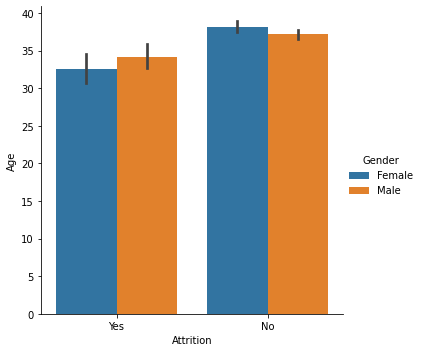

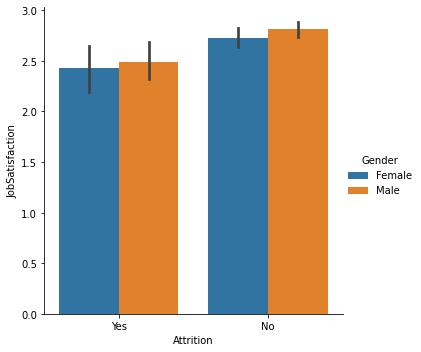

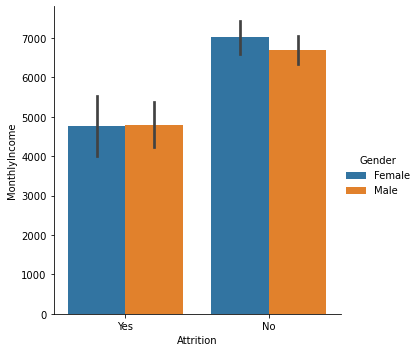

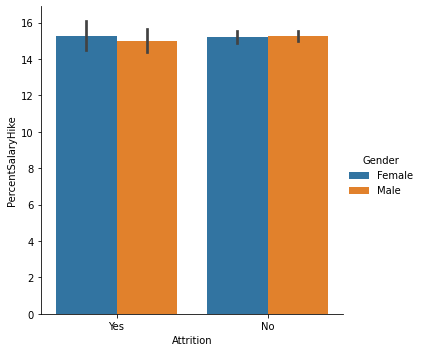

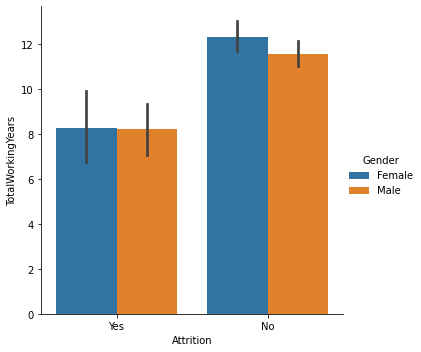

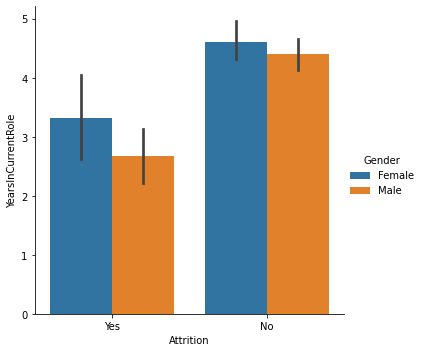

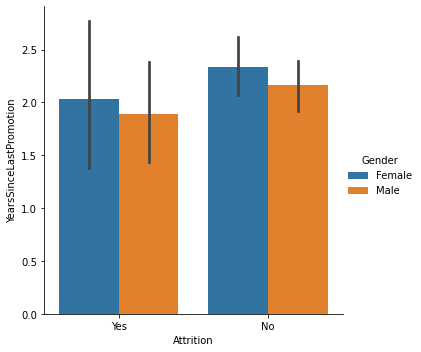

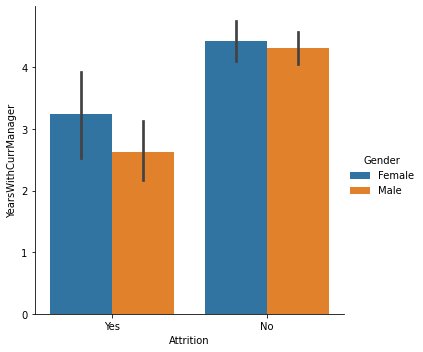

In [27]:
for i in clms:
    sns.catplot(x='Attrition', y=i, hue='Gender', kind='bar', data = df)

- From the above we can observe that for the lesser Job Satisfaction, attrition is more which is natural and obvious.
- The one with lesser monthly income leaves the job which is still logical. The max values for both male and female 
    lies between 4500 and 5000 per month.
- There is no issue with the salary hike.
- For the total working years the ones with lesser number are leaving the job more frequently. The max values for both is 8 years.
- Similarly attrition is high and that too for the females who are working in the current role.
- Similar observations are observed for the years since last promotion and the years working with the current manager.

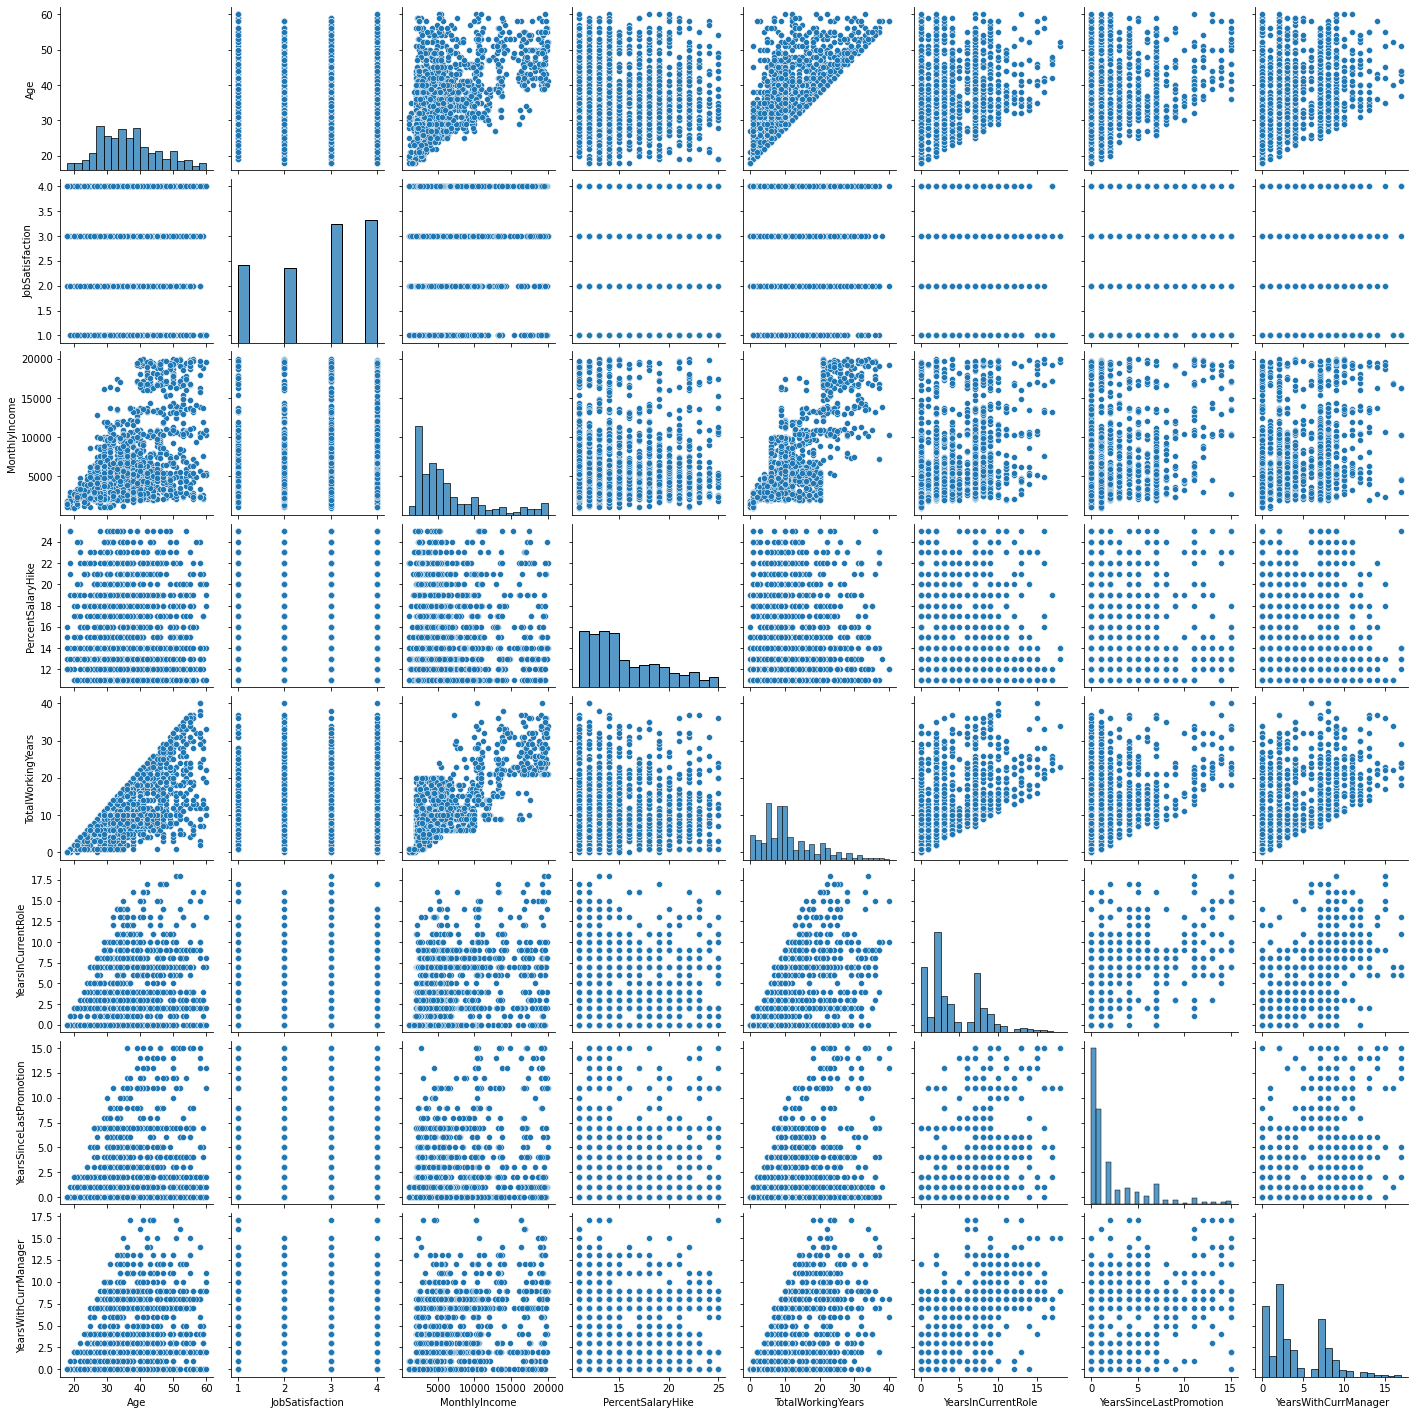

In [28]:
# sns.set()
# sns.pairplot(df[clms],height = 5 ,kind ='scatter',diag_kind='kde')
# plt.show()

sns.pairplot(df[clms], kind ='scatter')

- Not much can be concluded from the above plot.

## A little bit pre-processing

In [29]:
df.dtypes[df.dtypes == 'object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [30]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df['Attrition'].replace({'Yes':1, 'No':0}, inplace = True)
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [32]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [33]:
df['BusinessTravel'].replace({'Travel_Frequently':2, 'Travel_Rarely':1, 'Non-Travel':0}, inplace = True)
df['BusinessTravel'].unique()

array([1, 2, 0], dtype=int64)

In [34]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [35]:
df['Department'].replace({'Research & Development':2, 'Human Resources':1, 'Sales':0}, inplace = True)
df['Department'].unique()

array([0, 2, 1], dtype=int64)

In [36]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [37]:
label_encoder = preprocessing.LabelEncoder()
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [38]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [39]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)
df['Gender'].unique()

array([0, 1], dtype=int64)

In [40]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [41]:
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1])

In [42]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [43]:
df['MaritalStatus'].replace({'Married':2, 'Single':1, 'Divorced':0}, inplace = True)
df['MaritalStatus'].unique()

array([1, 2, 0], dtype=int64)

In [44]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
df['OverTime'].replace({'Yes':1, 'No':0}, inplace = True)
df['OverTime'].unique()

array([1, 0], dtype=int64)

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,2,0,94,3,2,7,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,3,1,61,2,2,6,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,4,4,1,92,2,1,2,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,4,0,56,3,1,6,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,1,40,3,1,2,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### Checking for the Outliers

In [48]:
df.shape

(1470, 31)

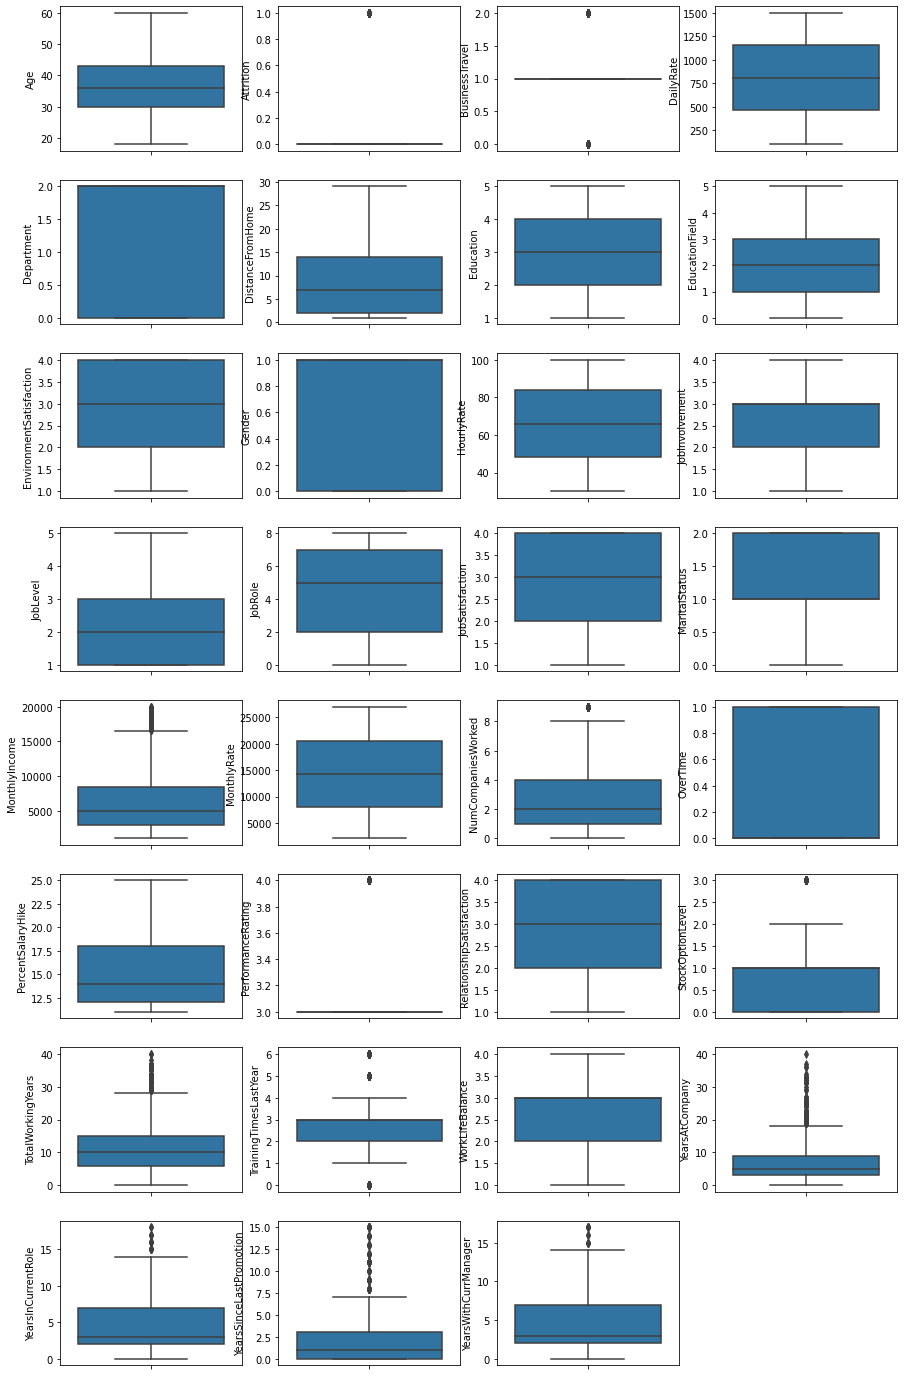

In [49]:
i = 1
plt.figure(figsize=(15,25))
for features in df.columns:
    plt.subplot(8,4,i)
    sns.boxplot(y=df[features])
    i+=1

- Some features have outliers value but some can be important ones.

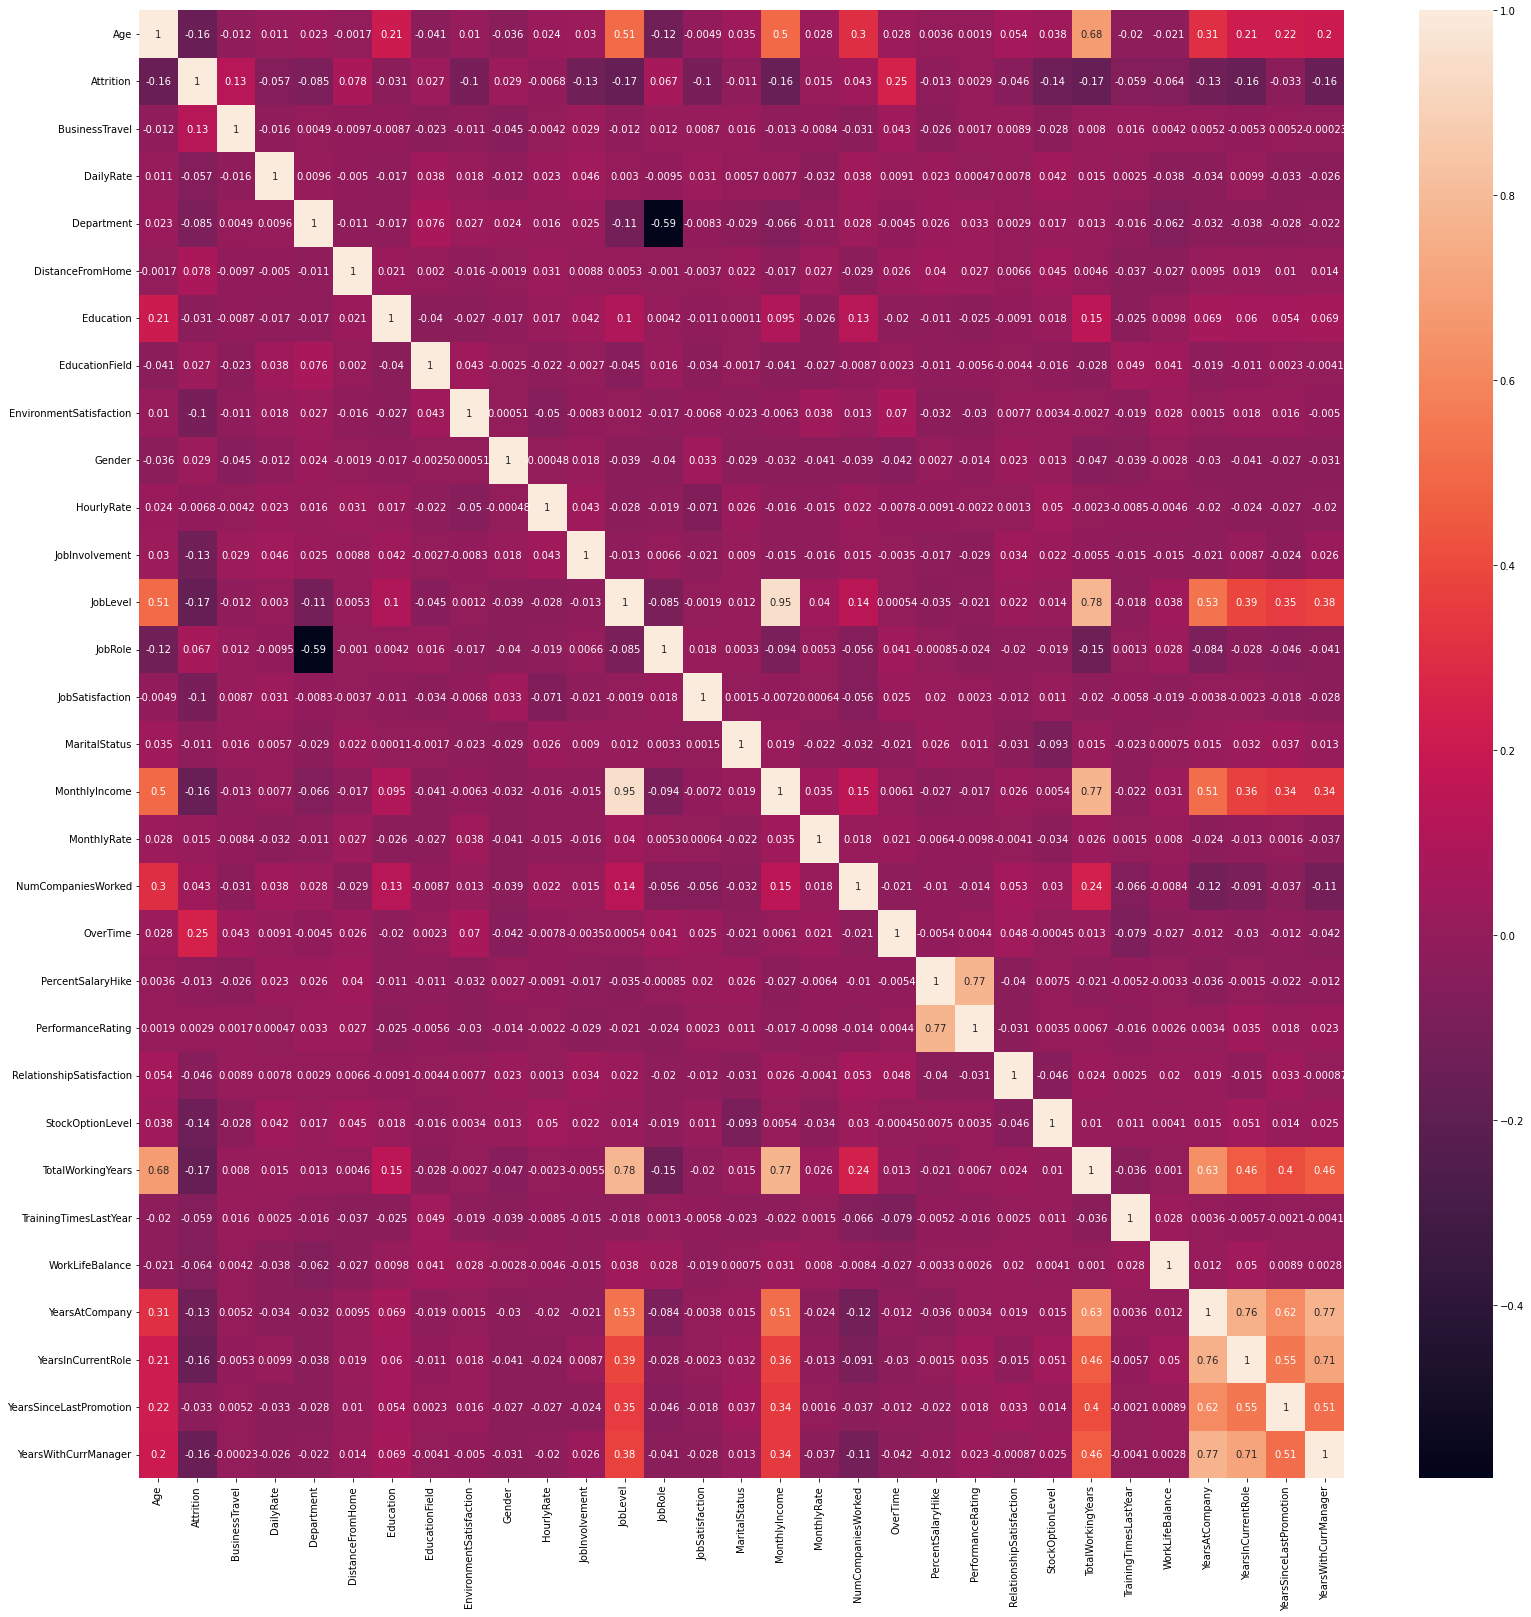

In [50]:
correlation = df.corr()
plt.figure(figsize = (27,27))
sns.heatmap(correlation, annot=True)
plt.show()

## Building the model

### Splitting the data

In [51]:
x = df.drop('Attrition', axis = 1)
y = df.Attrition

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

### Let's try Logistic regression

### Creating an instance of the model

In [68]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Predicting the values

In [69]:
logReg_ypred = log_reg.predict(x_test)
logReg_ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
y_test

405     1
272     0
1382    0
898     0
724     0
177     1
870     0
88      0
354     0
1172    0
892     1
127     1
1355    0
61      0
130     0
1306    0
422     1
1229    0
1436    0
616     0
824     0
340     0
449     0
505     0
994     0
733     0
605     0
514     1
1016    1
325     0
1068    1
996     0
214     1
1275    0
1411    0
70      0
1405    0
1073    0
499     0
1441    0
1118    0
942     0
324     0
294     0
1374    0
641     0
1094    0
1109    0
461     0
316     0
1188    0
464     0
658     0
42      1
107     1
1189    0
592     0
802     0
246     0
785     0
744     1
378     1
1231    0
117     0
1264    0
22      0
1243    0
201     0
612     0
610     0
871     1
538     0
568     1
93      0
484     0
1111    1
770     0
426     0
262     0
53      0
1466    0
194     0
1179    0
82      0
1276    0
916     0
905     0
348     0
237     0
714     0
1106    1
309     0
397     0
826     0
317     1
1154    0
455     0
695     1
1212    0
1070    0


### Evaluating the model

#### Confusion matrix

In [71]:
logReg_conMatrix = confusion_matrix(y_test, logReg_ypred)
logReg_conMatrix

array([[245,   1],
       [ 47,   1]], dtype=int64)

In [73]:
# Precision - Tp/(Tp+Fp)

1/(1+1)

0.5

In [74]:
precision_score(y_test, logReg_ypred)

0.5

In [75]:
# Recall - Tp/(Tp+Fn)

1/(1+47)

0.020833333333333332

In [76]:
recall_score(y_test, logReg_ypred)

0.020833333333333332

In [77]:
# accuracy >> Tp+Tn/Tp+Tn+Fp+Fn

(1+245)/(1+245+1+47)

0.8367346938775511

In [78]:
accuracy_score(y_test, logReg_ypred)

0.8367346938775511

In [84]:
print(classification_report(y_test, logReg_ypred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.50      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.78      0.84      0.77       294



In [87]:
logReg_ypredProb = log_reg.predict_proba(x_test)
logReg_ypredProb

array([[0.79707815, 0.20292185],
       [0.91950726, 0.08049274],
       [0.83779444, 0.16220556],
       [0.98527687, 0.01472313],
       [0.76978565, 0.23021435],
       [0.75167844, 0.24832156],
       [0.92703951, 0.07296049],
       [0.93859043, 0.06140957],
       [0.44321363, 0.55678637],
       [0.53950155, 0.46049845],
       [0.69786221, 0.30213779],
       [0.43368494, 0.56631506],
       [0.73343291, 0.26656709],
       [0.77391464, 0.22608536],
       [0.71005932, 0.28994068],
       [0.82201223, 0.17798777],
       [0.71969183, 0.28030817],
       [0.83875514, 0.16124486],
       [0.63185246, 0.36814754],
       [0.99150148, 0.00849852],
       [0.6493514 , 0.3506486 ],
       [0.86075278, 0.13924722],
       [0.92443631, 0.07556369],
       [0.85501897, 0.14498103],
       [0.89592765, 0.10407235],
       [0.94868633, 0.05131367],
       [0.86979044, 0.13020956],
       [0.85991503, 0.14008497],
       [0.56666567, 0.43333433],
       [0.94047169, 0.05952831],
       [0.

In [88]:
roc_auc = roc_auc_score(y_test, logReg_ypred)
roc_auc

0.5083841463414633

<h2><font color='tomato'> Since this score is very less hence it's a failed approach towards this model.</font></h2>

### ROC AUC Curve

In [92]:
fpr, tpr, thresold = roc_curve(y_test, logReg_ypred)
print(fpr,tpr,thresold,sep='\n')

[0.         0.00406504 1.        ]
[0.         0.02083333 1.        ]
[2 1 0]


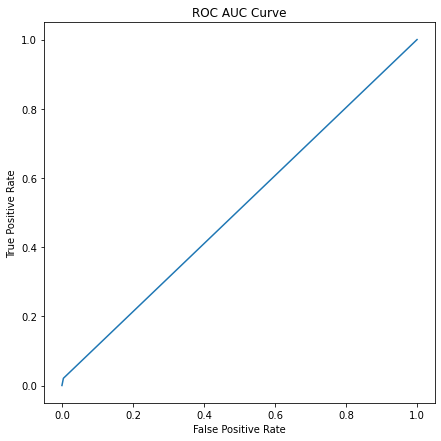

In [95]:
plt.figure(figsize=(7, 7))
plt.title('ROC AUC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()